<a href="https://colab.research.google.com/github/sujathasivaraman/mlai/blob/main/cnn_chicken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
#@title CNN program to predict chicken vs notachicken and plot ROC curve based on threshold

In [81]:
#@title RUN in GPU mode
# {"display-mode":"form", "form-width":"25%"}
#@markdown ##**BEFORE RUNNING ANY CODE, please change your Hardware Accelerator to GPU to train faster!**</h2>
#@markdown 1. Click on the **Runtime** menu at the top of the screen.
#@markdown 2. Click **Change Runtime Type**.
#@markdown 3. Choose **T4 GPU** under **Hardware Accelerator**.

#@markdown Once you've done that, run this code cell to check you're correctly connected!

import tensorflow as tf
from IPython.display import Markdown

if tf.test.gpu_device_name():
  display(Markdown("###✅ GPU connected!"))
else:
  display(Markdown("""
###❌ No GPU found!
If you're running into GPU limits when you try to switch, here are some suggestions:
  - Wait 12-24 hours for the limits to reset.
  - Share your copy of the notebook with another Google account that hasn't met the limit, and work through the notebook with that account.
  - Look into a paid subscription or paying for compute units as you go.
  """))


###❌ No GPU found!
If you're running into GPU limits when you try to switch, here are some suggestions:
  - Wait 12-24 hours for the limits to reset.
  - Share your copy of the notebook with another Google account that hasn't met the limit, and work through the notebook with that account.
  - Look into a paid subscription or paying for compute units as you go.
  

In [9]:
#@title IGNORE Google images download code
!pip install google-images-download
from google_images_download import google_images_download
import os # Import the os module to work with directories

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
search_queries = ['chicken', 'rooster', 'robot chicken', 'cartoon chicken']

def download_thumbnails(query, limit=10, output_dir='My Drive/Dataset/downloads'): # Use forward slash for path
    response = google_images_download.googleimagesdownload()
    arguments = {
        "keywords": query,
        "limit": limit,
        "print_urls": True,
        "size": "medium",  # Ensures thumbnails or smaller images
        "output_directory": output_dir, # Specify the output directory here
        "format": "jpg"
    }

    try:
        response.download(arguments)
        print(f"Thumbnails for '{query}' downloaded successfully!")

        # After download, count the images in the specified directory
        # Construct the full path to the downloaded images, which is within a subfolder named after the query
        downloaded_folder_path = os.path.join(output_dir, query.replace(" ", "_")) # Create the expected directory path
        if os.path.exists(downloaded_folder_path): # Check if the directory exists
            # List all entries in the folder
            files_in_folder = os.listdir(downloaded_folder_path)
            # Filter for files (excluding directories)
            image_files = [f for f in files_in_folder if os.path.isfile(os.path.join(downloaded_folder_path, f))]
            num_images = len(image_files)
            print(f"keyword: {query}")
            print(f"Number of images downloaded: {num_images}")
            print(f"Images are saved in the folder: {os.path.abspath(downloaded_folder_path)}") # Print the absolute path to the folder
        else:
             print(f"Could not find the expected download directory: {downloaded_folder_path}")


    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage

for query in search_queries:
    download_thumbnails(query)
    print()



# ext = ext if ext in ['jpg', 'jpeg', 'png', 'webp'] else 'jpg'
#         # Extract and clean file extension
#         ext_match = re.search(r'\.(jpg|jpeg|png|webp)', url, re.IGNORECASE)
#         ext = ext_match.group(1).lower() if ext_match else 'jpg'


Mounted at /content/drive

Item no.: 1 --> Item name = chicken
Evaluating...
Starting Download...


Unfortunately all 10 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

Thumbnails for 'chicken' downloaded successfully!
keyword: chicken
Number of images downloaded: 0
Images are saved in the folder: /content/My Drive/Dataset/downloads/chicken


Item no.: 1 --> Item name = rooster
Evaluating...
Starting Download...


Unfortunately all 10 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

Thumbnails for 'rooster' downloaded successfully!
keyword: rooster
Number of images downloaded: 0
Images are saved in the folder: /content/My Drive/Dataset/downloads/rooster


Item no.: 1 --> Item name = robot chicken
Evaluating...
Starting Download...


Unfortunately all 10 could not be downloaded because some images were not downloadable. 0 is all we got for this sea

In [27]:
#@title Alternate Image Download Code (Fixed)
!pip install -q --upgrade simple_image_download

from simple_image_download import simple_image_download as simp
import os

# Create downloader instance
downloader = simp.simple_image_download()

downloader = simp.simple_image_download()
downloader.directory = 'sujchick/'  # Replace 'my_custom_folder/' with your desired path
#downloader.download('chicken', 10)  # Download images

# Set default download directory
default_dir = downloader.directory

# Define keywords and limits
keywords = 'chicken'
download_limit = 5
url_limit = 15

# 1. Download images to default directory
print(f"\nDownloading {download_limit} images to default directory...")
downloader.download(keywords,limit=download_limit) # (keywords, limit=download_limit)
print(f"Images saved to: {os.path.join(default_dir, keywords[0].replace(' ', '_'))}")

# # 2. Search and cache URLs without downloading
# print(f"\nCaching {url_limit} image URLs...")
# urls = downloader.search_urls(keywords, limit=url_limit)

# # Print cached URLs
# print("\nCached URLs:")
# for i, url in enumerate(urls[keywords[0]]):
#     print(f"{i+1}. {url}")

# # 3. Download to custom directory
# custom_dir = 'sujchick'  # Custom directory path
# print(f"\nDownloading to custom directory: {custom_dir}")

# # Create new instance for custom directory
# custom_downloader = simp.simple_image_download()
# custom_downloader.directory = custom_dir

# # Create directory if not exists
# os.makedirs(os.path.join(custom_dir, keywords[0].replace(' ', '_')), exist_ok=True)

# # Download to custom location
# custom_downloader.download(keywords, limit=download_limit)
# print(f"Custom directory download complete!")

# Verify downloaded files
print("\nDownload verification:")
#for dir_path in [default_dir, custom_dir]:
for dir_path in [default_dir]:
    keyword_dir = keywords[0].replace(' ', '_')
    full_path = os.path.join(dir_path, keyword_dir)
    if os.path.exists(full_path):
        files = os.listdir(full_path)
        print(f"Found {len(files)} images in {full_path}")
    else:
        print(f"Directory not found: {full_path}")



Images saved to: sujchick/c

Download verification:
Directory not found: sujchick/c


In [28]:
#@title local drive python code run : Alternate Image Download Code (Fixed)
#C:\Users\<Username>\sujchick\chicken\
!pip install -q --upgrade simple_image_download

from simple_image_download import simple_image_download as simp
import os

# Create downloader instance
downloader = simp.simple_image_download()
downloader.directory = 'sujchick/'  # Relative path

# Get and print the resolved absolute path
default_dir = os.path.abspath(downloader.directory)
print(f"Base download directory: {default_dir}")

keywords = 'chicken'
download_limit = 5

print(f"\nDownloading {download_limit} images...")
downloader.download(keywords, limit=download_limit)

# Get actual download location
keyword_dir = keywords.replace(' ', '_')
actual_path = os.path.join(default_dir, keyword_dir)
print(f"Images saved to: {actual_path}")

# Verify downloaded files
print("\nDownload verification:")
if os.path.exists(actual_path):
    files = os.listdir(actual_path)
    print(f"Found {len(files)} images")
    print(f"Sample files: {files[:3]}")

    # Print full paths of first 3 files
    print("\nFull paths:")
    for i, f in enumerate(files[:3]):
        print(f"{i+1}. {os.path.join(actual_path, f)}")
else:
    print("Download directory not found")

Base download directory: /content/sujchick

Images saved to: /content/sujchick/chicken

Download verification:
Download directory not found


In [43]:
# # #@title Alternate Image Download Code for Colab and google drive
#@title Reliable Image Downloader for Colab with Google Drive
import os
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import random
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Configuration
keywords = 'chicken'
download_limit = 5
save_dir = '/content/drive/MyDrive/Dataset/downloads/'
os.makedirs(save_dir, exist_ok=True)

# User agents to rotate (prevents blocking)
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.1 Safari/605.1.15',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36'
]

def download_images(query, num_images, save_path):
    """Download images using Google search results"""
    search_url = f"https://www.google.com/search?q={query}&tbm=isch"
    headers = {'User-Agent': random.choice(USER_AGENTS)}

    response = requests.get(search_url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    images = soup.find_all('img')

    downloaded = 0
    for i, img in enumerate(images[1:]):  # Skip first result (often a logo)
        if downloaded >= num_images:
            break

        try:
            img_url = img['src']
            if not img_url.startswith('http'):
                continue

            print(f"Downloading image {downloaded+1}/{num_images}")
            img_data = requests.get(img_url, headers=headers, timeout=10).content

            # Save image
            img_path = os.path.join(save_path, f"{query}_{i}.jpg")
            with open(img_path, 'wb') as f:
                f.write(img_data)

            # Verify image
            try:
                Image.open(img_path).verify()
                downloaded += 1
                print(f"✓ Saved to {img_path}")
            except:
                os.remove(img_path)
                print("× Invalid image removed")

        except Exception as e:
            print(f"Error: {str(e)}")
            continue

    return downloaded

# Create keyword directory
keyword_dir = save_dir
#keyword_dir = os.path.join(save_dir, keywords.replace(' ', '_'))
os.makedirs(keyword_dir, exist_ok=True)
print(f"Download directory: {keyword_dir}")

# Download images
success_count = download_images(keywords, download_limit, keyword_dir)
print(f"\nSuccessfully downloaded {success_count}/{download_limit} images")

# Display results
if success_count > 0:
    files = os.listdir(keyword_dir)
    print("\nDownloaded files:")
    for f in files[:5]:  # Show first 5 files
        print(f"- {os.path.join(keyword_dir, f)}")

    # Display first image
    from IPython.display import Image, display
    try:
        first_image = os.path.join(keyword_dir, files[0])
        print(f"\nDisplaying first image: {files[0]}")
        display(Image(filename=first_image))
    except:
        print("Could not display image preview")
else:
    print("No images were downloaded successfully")

# #@title Fixed Image Download Code for Colab with Google Drive
# !pip install -q --upgrade simple_image_download

# from simple_image_download import simple_image_download as simp
# import os
# from google.colab import drive

# # Mount Google Drive FIRST
# drive.mount('/content/drive', force_remount=True)

# # Create downloader instance
# downloader = simp.simple_image_download()

# # Set download directory to Google Drive path
# downloader.directory = '/content/drive/MyDrive/Dataset/downloads/'  # Directly in Drive

# # Get and print the resolved absolute path
# absolute_path = os.path.abspath(downloader.directory)
# print(f"Download directory: {absolute_path}")

# # Create directory if it doesn't exist
# os.makedirs(absolute_path, exist_ok=True)

# keywords = 'chicken'
# download_limit = 5

# print(f"\nDownloading {download_limit} images...")
# downloader.download('hen', limit=download_limit)

# # Get actual download location
# keyword_dir = keywords.replace(' ', '_')
# #actual_path = os.path.join(absolute_path, keyword_dir)
# actual_path = os.path.join(absolute_path)
# print(f"Images saved to: {actual_path}")

# # Verify downloaded files
# print("\nDownload verification:")
# if os.path.exists(actual_path):
#     files = os.listdir(actual_path)
#     print(f"Found {len(files)} images")

#     # Display first 3 image paths
#     print("\nSample files:")
#     for i, f in enumerate(files[:3]):
#         print(f"{i+1}. {os.path.join(actual_path, f)}")

#     # Display first image
#     from IPython.display import Image, display
#     try:
#         first_image = os.path.join(actual_path, files[0])
#         print(f"\nDisplaying first image: {files[0]}")
#         display(Image(filename=first_image))
#     except:
#         print("\nCould not display image preview")
# else:
#     print("Download directory not found")

# print("\nDirect access in Google Drive:")
# print(f"Go to: https://drive.google.com/drive/u/0/folders/{os.path.basename(absolute_path)}")


Mounted at /content/drive
Download directory: /content/drive/MyDrive/Dataset/downloads/
Error: 'src'
Error: 'src'
Error: 'src'
Error: 'src'
Error: 'src'

Successfully downloaded 0/5 images
No images were downloaded successfully


In [1]:
#@title Chickens Google Drive :  Run this to load images and imports! {"display-mode":"form", "form-width":"25%"}
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np  # Added for numerical operations

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Constants
IMG_SHAPE = (160, 160)  # Tuple format
BATCH_SIZE = 32  # More manageable batch size
zip_path = '/content/drive/My Drive/Dataset/chicken_notachicken.zip'
# extract_dir = '/content/drive/My Drive/Dataset/cats_and_dogs_filtered_extracted'
# zip_path = '/content/drive/My Drive/Dataset/cats_and_dogs_filtered.zip'
extract_dir = '/content/drive/MyDrive/Dataset'

# Create extraction directory
os.makedirs(extract_dir, exist_ok=True)  # Safer directory creation

# # Extract ZIP
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     zip_ref.extractall(extract_dir)

# Dataset directories
base_dir = os.path.join(extract_dir, 'chicken_notachicken')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

print("Base directory:", base_dir)
print("Train Directory: ", train_dir)
print("Validation Directory: ", validation_dir)
print("Test Directory: ", test_dir)

# Verify directories
assert os.path.exists(train_dir), f"Train directory not found: {train_dir}"
assert os.path.exists(validation_dir), f"Validation directory not found: {validation_dir}"
assert os.path.exists(test_dir), f"Test directory not found: {test_dir}"

Mounted at /content/drive
Base directory: /content/drive/MyDrive/Dataset/chicken_notachicken
Train Directory:  /content/drive/MyDrive/Dataset/chicken_notachicken/train
Validation Directory:  /content/drive/MyDrive/Dataset/chicken_notachicken/validation
Test Directory:  /content/drive/MyDrive/Dataset/chicken_notachicken/test


In [2]:
#@title Chicken Keras create data generators with normalization
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
# Create data generators with normalization
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
#@title Chicken : Keras flow from directory : loading and augmenting image datasets
train_data = next(train_datagen.flow_from_directory(
    batch_size=76,
    directory=train_dir,
    shuffle=True,
    target_size=IMG_SHAPE, #(150,150)
    class_mode='binary')
)

validation_data = next(val_datagen.flow_from_directory(
    batch_size=5,
    directory=validation_dir,
    shuffle=False,
    target_size=IMG_SHAPE, #(150,150)
    class_mode='binary')
)

test_data = next(test_datagen.flow_from_directory(
    batch_size=25,
    directory=test_dir,
    shuffle=False,
    target_size=IMG_SHAPE, #(150,150)
    class_mode=None)
)

Found 124 images belonging to 2 classes.
Found 5 images belonging to 2 classes.
Found 15 images belonging to 1 classes.


Sample batch shape: (74, 160, 160, 3)
Sample labels shape: (74,)


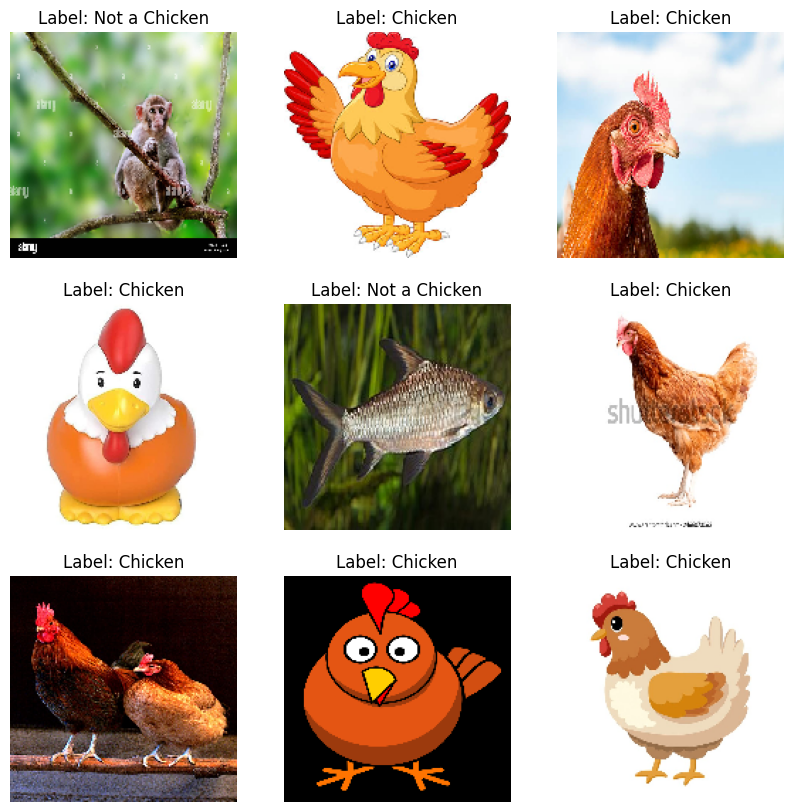

In [4]:
#@title  Optional: Load sample (train/validation/test) batch for inspection
# Unpack the tuple returned by the data generator
sample_images, sample_labels = train_data
#sample_images, sample_labels = validation_data
#sample_images, sample_labels = test_data # Note: test_data has class_mode=None, so it only returns images

print("Sample batch shape:", sample_images.shape)
print("Sample labels shape:", sample_labels.shape)

labels = ['Chicken', 'Not a Chicken']

# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(min(9, len(sample_images))): # Ensure we don't exceed the number of images
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    # Check if sample_labels is not None (for test_data) and display the label
    if sample_labels is not None and i < len(sample_labels):
      plt.title(f"Label: {labels[int(sample_labels[i])]}")
    plt.axis('off')
plt.show()


In [4]:
#@title Chicken : train/validate/test
cd_train_inputs, cd_train_labels = train_data
cd_validation_inputs, cd_validation_labels = validation_data
# [the test data doesnt have two folders like chicken or notachicken it has only data folder]
cd_test_inputs= test_data
#cd_test_inputs, cd_test_labels = test_data

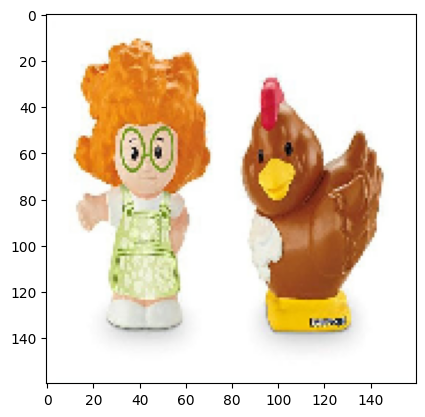

Label(train): Chicken


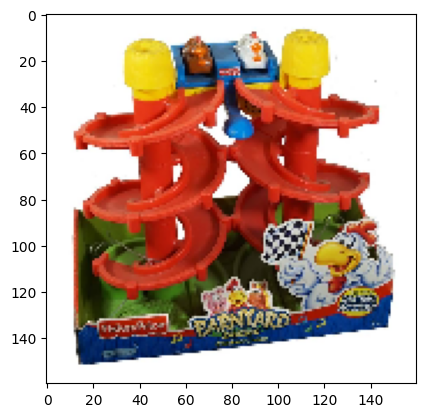

Label(validation): 1.0
Label(train): Not a Chicken


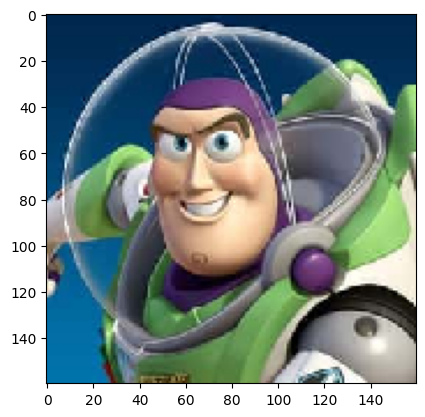

Label information is not available for test data.


In [5]:
#@title Chicken : Display random images
index = np.random.randint(len(cd_train_inputs))
plt.imshow(cd_train_inputs[index])
plt.show()
print("Label(train):", "Chicken" if cd_train_labels[index] <= 0 else "Not a Chicken")

index = np.random.randint(len(cd_validation_inputs))
plt.imshow(cd_validation_inputs[index])
plt.show()
print("Label(validation):", cd_validation_labels[index])
print("Label(train):", "Chicken" if cd_validation_labels[index] <= 0 else "Not a Chicken")

# [the test data doesnt have two folders like chicken or notachicken it has only data folder]
index = np.random.randint(len(cd_test_inputs))
plt.imshow(cd_test_inputs[index])
plt.show()
if isinstance(cd_test_inputs, tuple): # Check if test data includes labels
    if cd_test_inputs[1][index] is None:
        print("Label Doesn't exist")
    else:
        print(f"Label: {cd_test_inputs[1][index]}")
else: # Handle case where test data only includes images
    print("Label information is not available for test data.")

In [6]:
#@title Chicken : Load pretrained model MobileNetV2/EfficientNetB0/VGG16
from tensorflow.keras.applications import MobileNetV2
pretrained_MobileNetV2model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights='imagenet')
pretrained_MobileNetV2model .trainable = False

##################################################
from tensorflow.keras.applications import EfficientNetB0

pretrained_EfficientNetB0model = EfficientNetB0(input_shape=(160, 160, 3),
                                          include_top=False,
                                          weights='imagenet')

pretrained_EfficientNetB0model.trainable = False
####################################################
from tensorflow.keras.applications import VGG16
pretrained_VGG16model = VGG16(input_shape=(160, 160, 3),
                                          include_top=False,
                                          weights='imagenet')
pretrained_VGG16model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
#@title Chicken : Sequential Model For MobileNetV2, EfficientNetB0, VGG16 and Accuracy/Recall metric
cd_train_inputs, cd_train_labels = train_data
cd_test_inputs, cd_test_labels = validation_data

# modelmobilenetv2 = models.Sequential([
#  pretrained_MobileNetV2model,
#   layers.GlobalAveragePooling2D(),
#   layers.Dense(1)
# ])

# modelmobilenetv2.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# mobilenetv2_history = modelmobilenetv2.fit(cd_train_inputs, cd_train_labels,
#                     epochs=10,
#                     validation_data=validation_data)

#################################################
# modelefficientnetb0 = models.Sequential([
#  pretrained_MobileNetV2model,
#   layers.GlobalAveragePooling2D(),
#   layers.Dense(1)
# ])

# modelefficientnetb0.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# EfficientNetB0_history = modelefficientnetb0.fit(cd_train_inputs, cd_train_labels,
#                     epochs=10,
#                     validation_data=validation_data)
# #################################################
modelvgg16 = models.Sequential([
 pretrained_MobileNetV2model,
  layers.GlobalAveragePooling2D(),
  layers.Dense(1)
])
# SGD (Stochastic Gradient Descent): The simplest optimizer, good for smaller datasets or as a baseline. optimizer='sgd'
#RMSprop (Root Mean Square Propagation): An adaptive learning rate optimizer that performs well, especially for recurrent neural networks. optimizer='rmsprop'
#Adagrad: Adapts learning rates based on historical gradients and performs well on sparse data. optimizer='adagrad' or optimizer=tf.keras.optimizers.Adagrad(learning_rate=...)
#Adadelta: A variant of RMSprop that uses an adaptive learning rate and can converge faster. optimizer='adadelta' or optimizer=tf.keras.optimizers.Adadelta(learning_rate=...)
#Nadam (Nesterov Adam): An Adam variant with Nesterov momentum, potentially faster on some data. optimizer='nadam' or optimizer=tf.keras.optimizers.Nadam(learning_rate=...)
#Adamax: An Adam variant that uses the L-infinity norm of gradients, useful for sparse or high-variance gradients. optimizer='adamax'

# modelvgg16.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# modelvgg16.compile(optimizer=optimizers.SGD(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# modelvgg16.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
modelvgg16.compile(optimizer=optimizers.Adamax(learning_rate=0.0001),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
# modelvgg16.compile(optimizer=optimizers.Adamax(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['recall'])

vgg16_history = modelvgg16.fit(cd_train_inputs, cd_train_labels,
                    epochs=10,
                    validation_data=validation_data)




Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8546 - loss: 0.5211 - val_accuracy: 0.6000 - val_loss: 0.8699
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8495 - loss: 0.5310 - val_accuracy: 0.6000 - val_loss: 0.8834
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.8417 - loss: 0.4918 - val_accuracy: 0.6000 - val_loss: 0.8966
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 515ms/step - accuracy: 0.8951 - loss: 0.4620 - val_accuracy: 0.6000 - val_loss: 0.9105
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 506ms/step - accuracy: 0.8600 - loss: 0.4439 - val_accuracy: 0.6000 - val_loss: 0.9233
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 524ms/step - accuracy: 0.8522 - loss: 0.4414 - val_accuracy: 0.6000 - val_loss: 0.9363
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 979ms/step - accuracy: 0.8561 - loss: 0.4319 - val_accuracy: 0.6000 - val_loss: 0.9489
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 538ms/step - accuracy: 0.8756 - loss: 0.4002 - val_accuracy: 0.6000 - val_loss: 0.960

In [14]:
#@title Chicken:  Input/Output layer Model For MobileNetV2, EfficientNetB0, VGG16 and Recall metric
cd_train_inputs, cd_train_labels = train_data
cd_test_inputs, cd_test_labels = validation_data
from tensorflow import keras
#################################################
# # Define the input layer
# inputs = pretrained_MobileNetV2model.input
# x = layers.GlobalAveragePooling2D()(pretrained_MobileNetV2model.output)

# # Add the Dense layer
# outputs = layers.Dense(1)(x)

# # Create the model by specifying inputs and outputs
# modelmobilenetv2 = pretrained_MobileNetV2model(inputs=inputs, outputs=outputs)


# SGD (Stochastic Gradient Descent): The simplest optimizer, good for smaller datasets or as a baseline. optimizer='sgd'
#RMSprop (Root Mean Square Propagation): An adaptive learning rate optimizer that performs well, especially for recurrent neural networks. optimizer='rmsprop'
#Adagrad: Adapts learning rates based on historical gradients and performs well on sparse data. optimizer='adagrad' or optimizer=tf.keras.optimizers.Adagrad(learning_rate=...)
#Adadelta: A variant of RMSprop that uses an adaptive learning rate and can converge faster. optimizer='adadelta' or optimizer=tf.keras.optimizers.Adadelta(learning_rate=...)
#Nadam (Nesterov Adam): An Adam variant with Nesterov momentum, potentially faster on some data. optimizer='nadam' or optimizer=tf.keras.optimizers.Nadam(learning_rate=...)
#Adamax: An Adam variant that uses the L-infinity norm of gradients, useful for sparse or high-variance gradients. optimizer='adamax'

# modelmobilenetv2.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# modelmobilenetv2.compile(optimizer=optimizers.SGD(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# modelmobilenetv2.compile(optimizer=optimizers.RMSProp(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# modelmobilenetv2.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# modelmobilenetv2.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])
# modelmobilenetv2.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# mobilenetv2_history = modelmobilenetv2.fit(cd_train_inputs, cd_train_labels,
#                     epochs=10,
#                     validation_data=validation_data)

#################################################
# modelefficientnetb0 = models.Sequential([
#  pretrained_MobileNetV2model,
#   layers.GlobalAveragePooling2D(),
#   layers.Dense(1)
# ])

# modelefficientnetb0.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
#               loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# EfficientNetB0_history = modelefficientnetb0.fit(cd_train_inputs, cd_train_labels,
#                     epochs=10,
#                     validation_data=validation_data)
# #################################################
# Define input layer (assuming the input shape is determined by the pretrained_MobileNetV2model)
inputs = keras.Input(shape=pretrained_MobileNetV2model.input_shape[1:]) # Adjust input shape as needed
# Pass the input through the pretrained model
x = pretrained_MobileNetV2model(inputs)
# Add the GlobalAveragePooling2D layer
x = layers.GlobalAveragePooling2D()(x)
# Add the Dense layer
outputs = layers.Dense(1)(x)
# Create the model
modelvgg16 = keras.Model(inputs=inputs, outputs=outputs)
# Compile the model

modelvgg16.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001),
                   loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                   metrics=['recall'])
# Train the model
vgg16_history = modelvgg16.fit(cd_train_inputs, cd_train_labels,
                               epochs=10,
                               validation_data=validation_data)



Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - loss: 0.3990 - recall: 0.0000e+00 - val_loss: 0.9849 - val_recall: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 814ms/step - loss: 0.3346 - recall: 0.0000e+00 - val_loss: 0.9855 - val_recall: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 550ms/step - loss: 0.3619 - recall: 0.0000e+00 - val_loss: 0.9871 - val_recall: 0.0000e+00
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 523ms/step - loss: 0.3886 - recall: 0.0000e+00 - val_loss: 0.9891 - val_recall: 0.0000e+00
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - loss: 0.3587 - recall: 0.0000e+00 - val_loss: 0.9908 - val_recall: 0.0000e+00
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 712ms/step - loss: 0.3328 - recall: 0.0000e+00 - val_loss: 0.9926 - val_recall: 0.0000e+00
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 528ms/step - loss: 0.3794 - recall: 0.0000e+00 - val_loss: 0.9946 - val_recall: 0.0000e+00
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 912ms/step - loss: 0.3521 - recall: 0.0000e+00 - val_

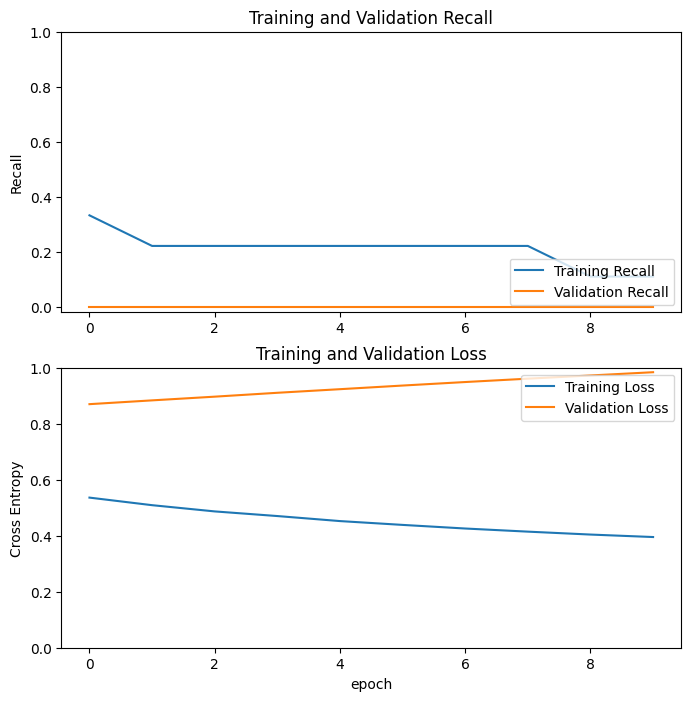

In [22]:
#@title Accuracy and Loss for modelhistory (MobileNetV2, EfficientB0, VGG16)
# acc = mobilenetv2_history .history['accuracy']
# val_acc = mobilenetv2_history.history['val_accuracy']
# loss = mobilenetv2_history.history['loss']
# val_loss = mobilenetv2_history.history['val_loss']

# acc = EfficientNetB0model_history .history['accuracy']
# val_acc = EfficientNetB0model_history.history['val_accuracy']
# loss = EfficientNetB0model_history.history['loss']
# val_loss = EfficientNetB0model_history.history['val_loss']

acc = vgg16_history.history['accuracy']
val_acc = vgg16_history.history['val_accuracy']
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']
############################################################

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
#plt.plot(acc, label='Training Accuracy')
#plt.plot(val_acc, label='Validation Accuracy')
##plt.ylabel('Accuracy')
#plt.title('Training and Validation Accuracy')
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Available keys in history object: dict_keys(['loss', 'recall', 'val_loss', 'val_recall'])


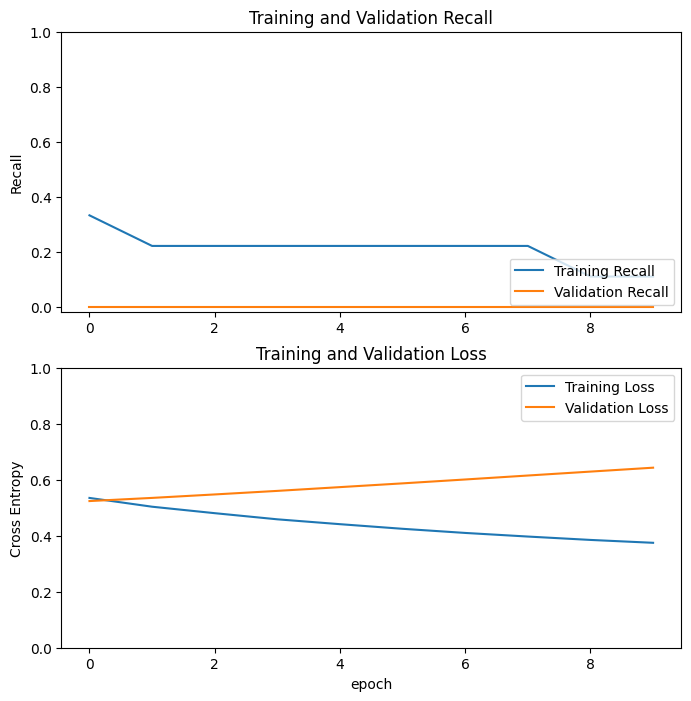

In [16]:
#@title Recall and Loss for modelhistory (MobileNetV2, EfficientB0, VGG16)
# recall = mobilenetv2_history.history['recall']
# val_recall = mobilenetv2_history.history['val_recall']
# loss = mobilenetv2_history.history['loss']
# val_loss = mobilenetv2_history.history['val_loss']

# recall = EfficientNetB0model_history .history['recall']
# val_recall = EfficientNetB0model_history.history['val_recall']
# loss = EfficientNetB0model_history.history['loss']
# val_loss = EfficientNetB0model_history.history['val_loss']

# Print available keys in the history object
print("Available keys in history object:", vgg16_history.history.keys())

recall = vgg16_history.history['recall']
val_recall = vgg16_history.history['val_recall']  # Assuming validation is enabled
loss = vgg16_history.history['loss']
val_loss = vgg16_history.history['val_loss']
###################################################################
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(recall, label='Training Recall')
plt.plot(val_recall, label='Validation Recall')
plt.legend(loc='lower right')
plt.ylabel('Recall')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Recall')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [23]:
#@title Convert the array to single to display label instead of accuracy
#predictions = modelmobilenetv2.predict(test_data)
#predictions = modelefficientnetb0.predict(test_data)
predictions = modelvgg16.predict(test_data)

pred_cat = []
# for i in range(len(predictions)):
#   print(predictions[i])

for i in range(len(predictions)):
  if predictions[i] < 0:
    pred_cat.append("Chicken")
  if predictions[i] > 0:
    pred_cat.append("Not a Chicken")
  print(predictions[i])
pred_cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[0.17337039]
[-1.4834981]
[-2.1377378]
[-1.5846816]
[-1.7248589]
[-2.0065675]
[0.17337039]
[-1.4644202]
[-1.4926115]
[-2.6867201]
[0.81555027]
[-1.2280636]
[-0.59078926]
[0.01123789]
[0.3339185]


['Not a Chicken',
 'Chicken',
 'Chicken',
 'Chicken',
 'Chicken',
 'Chicken',
 'Not a Chicken',
 'Chicken',
 'Chicken',
 'Chicken',
 'Not a Chicken',
 'Chicken',
 'Chicken',
 'Not a Chicken',
 'Not a Chicken']

15


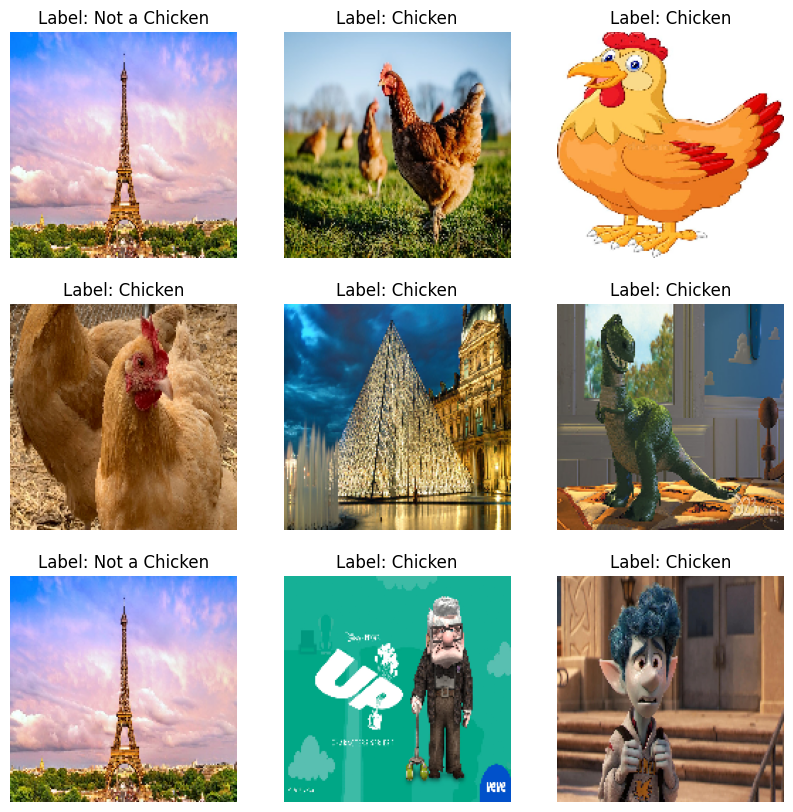

In [24]:
#@title Display labels for the unlabelled test data MobileNetV2, EfficientB0, VGG16

plt.figure(figsize=(10, 10))
print(len(test_data))
for i in range(min(9, len(test_data))): # Limit the loop to a maximum of 9 images
    plt.subplot(3, 3, i+1)
    plt.imshow(test_data[i])
#    plt.title(f"Label: {pred_cat[i]}({predictions[i]})")
    plt.title(f"Label: {pred_cat[i]}")
    plt.axis('off')
plt.show()

In [ ]:
@title Test with real picture
img_path = "path_to_your_photo"  # Replace with the path of your image
predicted_label = predict_image(model, img_path)

print(f"The model predicts that the image is a {predicted_label}")

In [ ]:
#@title IGNORE Load data,  Display pictures
#@title Load our data
data_raw, labels_raw = load_data()
data = data_raw.astype(float)
labels = categorical_to_numpy(labels_raw)
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.2, random_state=1)

### WRITE YOUR CODE BELOW: Print the image data and its shape using the shape attribute!
#plot_one_image(data_raw, labels_raw, 300) # Play around with the number!
def show_image(image_data, label, index):
    image = image_data[index].reshape(32, 32, 3)  # assuming CIFAR-style 32x32 RGB
    plt.imshow(image)
    plt.title(f"Label: {label[index]}")
    plt.axis('off')

# Plot 10 images in a 2x5 grid
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    show_image(data_raw, labels_raw, i)
plt.tight_layout()
plt.show()

In [ ]:
#@title Display data or images
index = np.random.randint(len(cd_train_inputs))
plt.imshow(cd_train_inputs[index] / 255)
plt.show()
print("Label:", cd_train_labels[index])

# Optional: Load sample batch for inspection
sample_images, sample_labels = next(train_generator)
print("Sample batch shape:", sample_images.shape)
print("Sample labels shape:", sample_labels.shape)

# Visualize sample images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Label: {sample_labels[i]}")
    plt.axis('off')
plt.show()